In [1]:
import requests
import pandas as pd

# API Endpoint for Toronto Police Major Crime Indicators Open Data
url = "https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/Major_Crime_Indicators_Open_Data/FeatureServer/0/query"

# Define the chunk size
Record_limit = 2000
all_features = []
offset = 0

print("Starting data extraction in chunks...")

while True:
    # Parameters for the API Endpoint
    params = {
        "where": "OCC_DATE >= timestamp '2025-01-01 00:00:00' AND OCC_DATE < timestamp '2025-04-01 00:00:00'",
        "outFields": "OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_140",
        "f": "json",
        "resultRecordCount": Record_limit,
        "resultOffset": offset # offset parameter for pagination
    }

    # Make the HTTP GET request to the API
    print(f"Fetching chunk starting from offset {offset}...")
    response = requests.get(url, params=params)

    # Raise an exception for HTTP errors (e.g., 404, 500)
    response.raise_for_status()

    # Parse the JSON response and extract features (records)
    data = response.json()
    features = [rec["attributes"] for rec in data.get("features", [])]

    # Append the extracted features to the all_features list
    all_features.extend(features)

    # Check if the number of features returned is less than the Record_limit
    # If it is, it means we have reached the end of the data
    if len(features) < Record_limit :
        print("Reached the end of the data.")
        break

    # Increment the offset for the next chunk
    offset += Record_limit

print(f"\nTotal features extracted: {len(all_features)}")

# Convert the list of dictionaries (all_features) into a Pandas DataFrame
df = pd.DataFrame(all_features)

# Convert timestamp columns (OCC_DATE) from milliseconds since epoch to datetime objects
# The API returns OCC_DATE in UTC milliseconds
df["OCC_DATE"] = pd.to_datetime(df["OCC_DATE"], unit="ms")

# Display the first few rows of the DataFrame to verify the data
print("\nFirst 5 rows of the combined DataFrame:")
display(df.head())

# Display information about the DataFrame
print("\nCombined DataFrame Info:")
print(df.info())

# Save the extracted data to a CSV file
csv_filename = "toronto_crime_jan_mar_2025_all.csv"
df.to_csv(csv_filename, index=False)
print(f"\nAll extracted data successfully saved to {csv_filename}")

Starting data extraction in chunks...
Fetching chunk starting from offset 0...
Fetching chunk starting from offset 2000...
Fetching chunk starting from offset 4000...
Fetching chunk starting from offset 6000...
Fetching chunk starting from offset 8000...
Reached the end of the data.

Total features extracted: 9650

First 5 rows of the combined DataFrame:


,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_140
0,2025-01-01 05:00:00,2025,January,1,Wednesday,23,Commercial,Discharge Firearm With Intent,Assault,Milliken (130)
1,2025-01-01 05:00:00,2025,January,1,Wednesday,17,Apartment,Assault,Assault,Dorset Park (126)
2,2025-01-01 05:00:00,2025,January,1,Wednesday,15,Apartment,Assault,Assault,Niagara (82)
3,2025-01-01 05:00:00,2025,January,1,Wednesday,23,Transit,Assault With Weapon,Assault,Newtonbrook West (36)
4,2025-01-01 05:00:00,2025,January,1,Wednesday,4,Apartment,Assault,Assault,Mimico (includes Humber Bay Shores) (17)



Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OCC_DATE           9650 non-null   datetime64[ns]
 1   OCC_YEAR           9650 non-null   object        
 2   OCC_MONTH          9650 non-null   object        
 3   OCC_DAY            9650 non-null   object        
 4   OCC_DOW            9650 non-null   object        
 5   OCC_HOUR           9650 non-null   object        
 6   PREMISES_TYPE      9650 non-null   object        
 7   OFFENCE            9650 non-null   object        
 8   MCI_CATEGORY       9650 non-null   object        
 9   NEIGHBOURHOOD_140  9650 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 754.0+ KB
None

All extracted data successfully saved to toronto_crime_jan_mar_2025_all.csv


In [2]:
display(df.tail())

,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_140
9645,2025-01-18 05:00:00,2025,January,18,Saturday,18,Apartment,Assault,Assault,Weston (113)
9646,2025-01-01 05:00:00,2025,January,1,Wednesday,14,Apartment,Assault,Assault,Bayview Village (52)
9647,2025-01-01 05:00:00,2025,January,1,Wednesday,8,Apartment,Assault With Weapon,Assault,Woburn (137)
9648,2025-02-12 05:00:00,2025,February,12,Wednesday,14,Outside,Assault With Weapon,Assault,Danforth (66)
9649,2025-02-12 05:00:00,2025,February,12,Wednesday,14,Outside,Assault With Weapon,Assault,Danforth (66)


In [3]:
df.describe

<bound method NDFrame.describe of                 OCC_DATE OCC_YEAR OCC_MONTH OCC_DAY     OCC_DOW OCC_HOUR  \
0    2025-01-01 05:00:00     2025   January       1  Wednesday        23   
1    2025-01-01 05:00:00     2025   January       1  Wednesday        17   
2    2025-01-01 05:00:00     2025   January       1  Wednesday        15   
3    2025-01-01 05:00:00     2025   January       1  Wednesday        23   
4    2025-01-01 05:00:00     2025   January       1  Wednesday         4   
...                  ...      ...       ...     ...         ...      ...   
9645 2025-01-18 05:00:00     2025   January      18  Saturday         18   
9646 2025-01-01 05:00:00     2025   January       1  Wednesday        14   
9647 2025-01-01 05:00:00     2025   January       1  Wednesday         8   
9648 2025-02-12 05:00:00     2025  February      12  Wednesday        14   
9649 2025-02-12 05:00:00     2025  February      12  Wednesday        14   

     PREMISES_TYPE                        OFFENCE MCI_CATEGORY  \
0       Commercial  Discharge Firearm With Intent      Assault   
1        Apartment                        Assault      Assault   
2        Apartment                        Assault      Assault   
3          Transit            Assault With Weapon      Assault   
4        Apartment                        Assault      Assault   
...            ...                            ...          ...   
9645     Apartment                        Assault      Assault   
9646     Apartment                        Assault      Assault   
9647     Apartment            Assault With Weapon      Assault   
9648       Outside            Assault With Weapon      Assault   
9649       Outside            Assault With Weapon      Assault   

                             NEIGHBOURHOOD_140  
0                               Milliken (130)  
1                            Dorset Park (126)  
2                                 Niagara (82)  
3                        Newtonbrook West (36)  
4     Mimico (includes Humber Bay Shores) (17)  
...                                        ...  
9645                              Weston (113)  
9646                      Bayview Village (52)  
9647                              Woburn (137)  
9648                             Danforth (66)  
9649                             Danforth (66)  

[9650 rows x 10 columns]>

In [4]:
# Split OCC_DATE into date and time columns
df['OCC_DATE_ONLY'] = df['OCC_DATE'].dt.date
df['OCC_TIME_ONLY'] = df['OCC_DATE'].dt.time

# Display the updated DataFrame with new columns
print("\nDataFrame with split date and time columns:")
display(df.head())



DataFrame with split date and time columns:


,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_140,OCC_DATE_ONLY,OCC_TIME_ONLY
0,2025-01-01 05:00:00,2025,January,1,Wednesday,23,Commercial,Discharge Firearm With Intent,Assault,Milliken (130),2025-01-01,05:00:00
1,2025-01-01 05:00:00,2025,January,1,Wednesday,17,Apartment,Assault,Assault,Dorset Park (126),2025-01-01,05:00:00
2,2025-01-01 05:00:00,2025,January,1,Wednesday,15,Apartment,Assault,Assault,Niagara (82),2025-01-01,05:00:00
3,2025-01-01 05:00:00,2025,January,1,Wednesday,23,Transit,Assault With Weapon,Assault,Newtonbrook West (36),2025-01-01,05:00:00
4,2025-01-01 05:00:00,2025,January,1,Wednesday,4,Apartment,Assault,Assault,Mimico (includes Humber Bay Shores) (17),2025-01-01,05:00:00


In [5]:
# Drop the original OCC_DATE column and the temporary time columns
df = df.drop(columns=['OCC_DATE','OCC_TIME_ONLY'])

# Display the updated DataFrame to verify the columns are removed
print("\nDataFrame after dropping date and time columns:")
display(df.head())


DataFrame after dropping date and time columns:


,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_140,OCC_DATE_ONLY
0,2025,January,1,Wednesday,23,Commercial,Discharge Firearm With Intent,Assault,Milliken (130),2025-01-01
1,2025,January,1,Wednesday,17,Apartment,Assault,Assault,Dorset Park (126),2025-01-01
2,2025,January,1,Wednesday,15,Apartment,Assault,Assault,Niagara (82),2025-01-01
3,2025,January,1,Wednesday,23,Transit,Assault With Weapon,Assault,Newtonbrook West (36),2025-01-01
4,2025,January,1,Wednesday,4,Apartment,Assault,Assault,Mimico (includes Humber Bay Shores) (17),2025-01-01


In [6]:
# Rename the 'OCC_DATE_ONLY' column to 'OCC_DATE'
df = df.rename(columns={'OCC_DATE_ONLY': 'OCC_DATE'})

# Get the list of columns
cols = df.columns.tolist()

# Move 'OCC_DATE' to the first position
cols.insert(0, cols.pop(cols.index('OCC_DATE')))

# Reindex the DataFrame with the new column order
df = df[cols]

# Display the updated DataFrame to verify the changes
print("\nDataFrame after renaming and reordering columns:")
display(df.head())


DataFrame after renaming and reordering columns:


,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_140
0,2025-01-01,2025,January,1,Wednesday,23,Commercial,Discharge Firearm With Intent,Assault,Milliken (130)
1,2025-01-01,2025,January,1,Wednesday,17,Apartment,Assault,Assault,Dorset Park (126)
2,2025-01-01,2025,January,1,Wednesday,15,Apartment,Assault,Assault,Niagara (82)
3,2025-01-01,2025,January,1,Wednesday,23,Transit,Assault With Weapon,Assault,Newtonbrook West (36)
4,2025-01-01,2025,January,1,Wednesday,4,Apartment,Assault,Assault,Mimico (includes Humber Bay Shores) (17)


In [7]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()

if num_duplicates > 0:
    print(f"\nFound {num_duplicates} duplicate rows.")
    # Display the duplicate rows
    print("\nDuplicate rows:")
    display(df[df.duplicated(keep=False)]) # keep=False to show all duplicates, not just the subsequent ones
else:
    print("\nNo duplicate rows found.")


Found 786 duplicate rows.

Duplicate rows:


,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_140
10,2025-01-01,2025,January,1,Wednesday,3,Apartment,Assault,Assault,New Toronto (18)
11,2025-01-01,2025,January,1,Wednesday,3,Apartment,Assault,Assault,New Toronto (18)
17,2025-01-01,2025,January,1,Wednesday,1,Commercial,Assault,Assault,Waterfront Communities-The Island (77)
20,2025-01-01,2025,January,1,Wednesday,2,Commercial,Assault,Assault,Niagara (82)
23,2025-01-01,2025,January,1,Wednesday,18,Apartment,Assault,Assault,South Parkdale (85)
...,...,...,...,...,...,...,...,...,...,...
9624,2025-01-17,2025,January,17,Friday,9,House,Assault,Assault,Parkwoods-Donalda (45)
9642,2025-02-12,2025,February,12,Wednesday,17,Apartment,Assault,Assault,Banbury-Don Mills (42)
9643,2025-02-12,2025,February,12,Wednesday,17,Apartment,Assault,Assault,Banbury-Don Mills (42)
9648,2025-02-12,2025,February,12,Wednesday,14,Outside,Assault With Weapon,Assault,Danforth (66)


In [8]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Verify the number of rows after removing duplicates
print(f"\nNumber of rows after removing duplicates: {len(df_cleaned)}")

# Save the cleaned data to a new CSV file
cleaned_csv_filename = "toronto_crime_jan_mar_2025_cleaned.csv"
df_cleaned.to_csv(cleaned_csv_filename, index=False)
print(f"Cleaned data successfully saved to {cleaned_csv_filename}")


Number of rows after removing duplicates: 8864
Cleaned data successfully saved to toronto_crime_jan_mar_2025_cleaned.csv


In [9]:
len(df_cleaned)

8864

In [10]:
import requests
import pandas as pd
from datetime import datetime

# API Configuration
url = "https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/Major_Crime_Indicators_Open_Data/FeatureServer/0/query"
Record_limit = 2000
all_features = []
offset = 0

print("Starting data extraction for Power BI...")

while True:
    params = {
        "where": "OCC_DATE >= timestamp '2025-01-01 00:00:00' AND OCC_DATE < timestamp '2025-04-01 00:00:00'",
        "outFields": "OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_140",
        "f": "json",
        "resultRecordCount": Record_limit,
        "resultOffset": offset
    }

    try:
        response = requests.get(url, params=params, timeout=30)
        response.raise_for_status()

        data = response.json()
        features = [rec["attributes"] for rec in data.get("features", [])]
        all_features.extend(features)

        if len(features) < Record_limit:
            break

        offset += Record_limit

    except Exception as e:
        print(f"Error: {e}")
        break

# Create DataFrame
df = pd.DataFrame(all_features)

# Data transformations for Power BI
df["OCC_DATE"] = pd.to_datetime(df["OCC_DATE"], unit="ms")
df["OCC_DATE_ONLY"] = df["OCC_DATE"].dt.date
df["OCC_TIME"] = df["OCC_DATE"].dt.time

# Add calculated columns
df["CRIME_SEVERITY"] = df["MCI_CATEGORY"].map({
    "Assault": 3,
    "Break and Enter": 2,
    "Auto Theft": 2,
    "Robbery": 4,
    "Theft Over": 1,
    "Homicide": 5
}).fillna(1)

# Clean data

df = df.dropna(subset=['OCC_DATE', 'MCI_CATEGORY'])
df["PREMISES_TYPE"] = df["PREMISES_TYPE"].fillna("Unknown")
df["NEIGHBOURHOOD_140"] = df["NEIGHBOURHOOD_140"].fillna("Unknown")

# Drop the original OCC_DATE column and the temporary time columns
df = df.drop(columns=['OCC_DATE','OCC_TIME'])

# Rename the 'OCC_DATE_ONLY' column to 'OCC_DATE'
df = df.rename(columns={'OCC_DATE_ONLY': 'OCC_DATE'})

# Get the list of columns
cols = df.columns.tolist()

# Move 'OCC_DATE' to the first position
cols.insert(0, cols.pop(cols.index('OCC_DATE')))

# Reindex the DataFrame with the new column order
df = df[cols]

# Remove duplicate rows
df= df.drop_duplicates()

# Verify the number of rows after removing duplicates
print(f"\nNumber of rows after removing duplicates: {len(df)}")

print(f"Final dataset: {len(df)} rows, {len(df.columns)} columns")


Starting data extraction for Power BI...

Number of rows after removing duplicates: 8864
Final dataset: 8864 rows, 11 columns


In [11]:
df.head()

,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_140,CRIME_SEVERITY
0,2025-01-01,2025,January,1,Wednesday,23,Commercial,Discharge Firearm With Intent,Assault,Milliken (130),3
1,2025-01-01,2025,January,1,Wednesday,17,Apartment,Assault,Assault,Dorset Park (126),3
2,2025-01-01,2025,January,1,Wednesday,15,Apartment,Assault,Assault,Niagara (82),3
3,2025-01-01,2025,January,1,Wednesday,23,Transit,Assault With Weapon,Assault,Newtonbrook West (36),3
4,2025-01-01,2025,January,1,Wednesday,4,Apartment,Assault,Assault,Mimico (includes Humber Bay Shores) (17),3


In [12]:
# Create a dictionary to map month names to numerical order
month_order = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Create the 'Month Order' column by mapping 'OCC_MONTH'
df['MONTH_ORDER'] = df['OCC_MONTH'].map(month_order)

# Display the updated DataFrame with the new column
print("\nDataFrame with 'MONTH_ORDER' column:")
display(df.head(99))


DataFrame with 'MONTH_ORDER' column:


,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_140,CRIME_SEVERITY,MONTH_ORDER
0,2025-01-01,2025,January,1,Wednesday,23,Commercial,Discharge Firearm With Intent,Assault,Milliken (130),3,1
1,2025-01-01,2025,January,1,Wednesday,17,Apartment,Assault,Assault,Dorset Park (126),3,1
2,2025-01-01,2025,January,1,Wednesday,15,Apartment,Assault,Assault,Niagara (82),3,1
3,2025-01-01,2025,January,1,Wednesday,23,Transit,Assault With Weapon,Assault,Newtonbrook West (36),3,1
4,2025-01-01,2025,January,1,Wednesday,4,Apartment,Assault,Assault,Mimico (includes Humber Bay Shores) (17),3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99,2025-01-02,2025,January,2,Thursday,18,Outside,Robbery - Swarming,Robbery,Kensington-Chinatown (78),4,1
100,2025-01-02,2025,January,2,Thursday,13,House,Unlawfully In Dwelling-House,Break and Enter,Woburn (137),2,1
101,2025-01-02,2025,January,2,Thursday,2,Commercial,B&E,Break and Enter,Dufferin Grove (83),2,1
102,2025-01-02,2025,January,2,Thursday,7,Other,Assault,Assault,Kensington-Chinatown (78),3,1


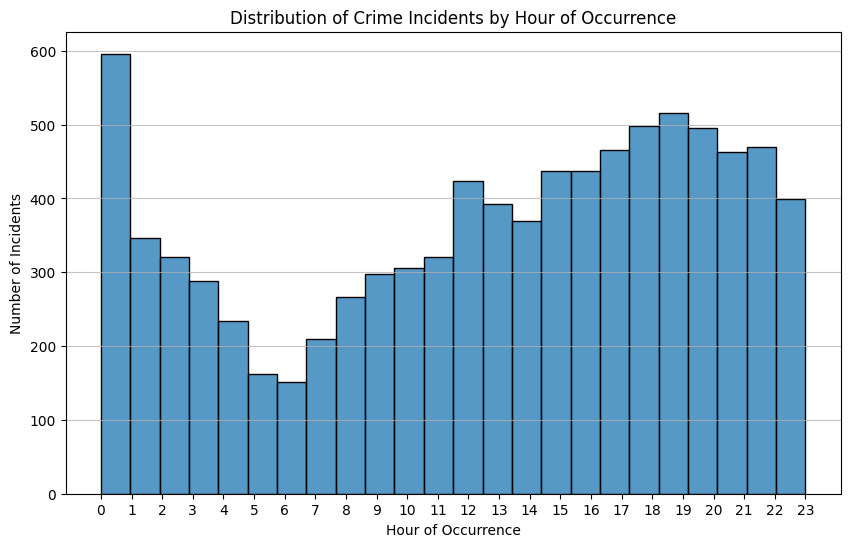

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the 'OCC_HOUR' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='OCC_HOUR', bins=24, kde=False)
plt.xlabel("Hour of Occurrence")
plt.ylabel("Number of Incidents")
plt.title("Distribution of Crime Incidents by Hour of Occurrence")
plt.xticks(range(0, 24)) # Set x-axis ticks to represent each hour
plt.grid(axis='y', alpha=0.75)
plt.show()

# Task
Explain the provided code, and then explain how to perform clustering on the data using a combination of factors.

## Explain the code

### Subtask:
Explain the provided code.


**Reasoning**:
Explain the code in the first code cell.



In [13]:
# Explanation of the first code cell (cell_id: 24a32da6)

# This cell's primary purpose is to extract crime data from the Toronto Police Major Crime Indicators Open Data API.
# It specifically targets data between January 1st, 2025, and April 1st, 2025.

# 1. Import necessary libraries:
#    - `requests`: Used to make HTTP requests to the API endpoint.
#    - `pandas`: Used for data manipulation and creating a DataFrame from the extracted data.

# 2. API Configuration:
#    - `url`: The base URL of the API endpoint.
#    - `Record_limit`: Defines the number of records to fetch in each API request (chunk size) to handle pagination.
#    - `all_features`: An empty list initialized to store all the extracted crime records.
#    - `offset`: Initializes the starting point for fetching records, used for pagination.

# 3. Data Extraction Loop:
#    - A `while True` loop is used to repeatedly fetch data chunks until all records are retrieved.
#    - Inside the loop, `params` dictionary is created to specify the query parameters for the API request:
#      - `"where"`: Filters the data to include records within the specified date range (Jan 1, 2025 to Apr 1, 2025).
#      - `"outFields"`: Specifies the columns to retrieve from the API.
#      - `"f"`: Specifies the output format as JSON.
#      - `"resultRecordCount"`: Sets the number of records to return per request (the chunk size).
#      - `"resultOffset"`: Specifies the starting offset for the current chunk, enabling pagination.
#    - `requests.get(url, params=params)`: Makes the actual GET request to the API with the defined parameters.
#    - `response.raise_for_status()`: Checks for HTTP errors in the response. If an error occurs (e.g., 404, 500), it raises an exception.
#    - `data = response.json()`: Parses the JSON response received from the API.
#    - `features = [rec["attributes"] for rec in data.get("features", [])]`: Extracts the list of crime records (features) from the JSON response. Each feature's attributes contain the actual data.
#    - `all_features.extend(features)`: Appends the extracted features from the current chunk to the `all_features` list.
#    - `if len(features) < Record_limit:`: Checks if the number of features returned in the current chunk is less than the `Record_limit`. If it is, it means there are no more records to fetch, and the loop breaks.
#    - `offset += Record_limit`: Increments the offset by the `Record_limit` for the next API request to fetch the subsequent chunk of data.

# 4. Data Processing:
#    - `df = pd.DataFrame(all_features)`: Converts the list of dictionaries (`all_features`) into a pandas DataFrame.
#    - `df["OCC_DATE"] = pd.to_datetime(df["OCC_DATE"], unit="ms")`: Converts the `OCC_DATE` column from milliseconds since the epoch (as returned by the API) to datetime objects.

# 5. Data Verification and Saving:
#    - `display(df.head())`: Displays the first few rows of the created DataFrame to visually inspect the data.
#    - `print(df.info())`: Prints information about the DataFrame, including column data types and non-null counts.
#    - `csv_filename = "toronto_crime_jan_mar_2025_all.csv"`: Defines the filename for saving the data.
#    - `df.to_csv(csv_filename, index=False)`: Saves the DataFrame to a CSV file. `index=False` prevents writing the DataFrame index as a column in the CSV.

## Select features

### Subtask:
Choose the columns (combination of factors) that you want to use for clustering.


**Reasoning**:
Examine the columns in the DataFrame `df` to identify relevant features for clustering crime incidents based on the available data and the goal of understanding patterns.



In [14]:
print("Columns in the DataFrame:")
print(df.columns)

print("\nData types of the columns:")
print(df.dtypes)

print("\nUnique values and their counts for selected categorical columns:")
for col in ['MCI_CATEGORY', 'PREMISES_TYPE', 'OCC_DOW', 'OCC_HOUR']:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts().head())

print("\nRange of values for numerical columns:")
for col in ['CRIME_SEVERITY', 'MONTH_ORDER']:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].agg(['min', 'max']))


Columns in the DataFrame:
Index(['OCC_DATE', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOW', 'OCC_HOUR',
       'PREMISES_TYPE', 'OFFENCE', 'MCI_CATEGORY', 'NEIGHBOURHOOD_140',
       'CRIME_SEVERITY', 'MONTH_ORDER'],
      dtype='object')

Data types of the columns:
OCC_DATE             object
OCC_YEAR             object
OCC_MONTH            object
OCC_DAY              object
OCC_DOW              object
OCC_HOUR             object
PREMISES_TYPE        object
OFFENCE              object
MCI_CATEGORY         object
NEIGHBOURHOOD_140    object
CRIME_SEVERITY        int64
MONTH_ORDER           int64
dtype: object

Unique values and their counts for selected categorical columns:

MCI_CATEGORY:
MCI_CATEGORY
Assault            4815
Break and Enter    1559
Auto Theft         1499
Robbery             609
Theft Over          382
Name: count, dtype: int64

PREMISES_TYPE:
PREMISES_TYPE
Apartment     2146
Outside       2144
Commercial    1787
House         1452
Other          728
Name: count, dtype

**Reasoning**:
Based on the column information, I will select columns that represent the time of the crime (OCC_HOUR, OCC_DOW, MONTH_ORDER), the type of crime (MCI_CATEGORY, CRIME_SEVERITY), and the location (PREMISES_TYPE, NEIGHBOURHOOD_140) as factors for clustering. I will convert categorical features to numerical using one-hot encoding or similar methods if needed for clustering algorithms that require numerical input, and then create a new DataFrame with these selected and processed columns.



In [15]:
# Select relevant columns for clustering
clustering_features = ['OCC_HOUR', 'OCC_DOW', 'MONTH_ORDER', 'MCI_CATEGORY', 'CRIME_SEVERITY', 'PREMISES_TYPE', 'NEIGHBOURHOOD_140']

# Create a new DataFrame with selected columns
df_clustering = df[clustering_features].copy()

# Convert categorical features to numerical using one-hot encoding
df_clustering = pd.get_dummies(df_clustering, columns=['OCC_DOW', 'MCI_CATEGORY', 'PREMISES_TYPE', 'NEIGHBOURHOOD_140'], drop_first=True)

# Convert OCC_HOUR and MONTH_ORDER to numeric types if they are not already
df_clustering['OCC_HOUR'] = pd.to_numeric(df_clustering['OCC_HOUR'])
df_clustering['MONTH_ORDER'] = pd.to_numeric(df_clustering['MONTH_ORDER'])


print("\nDataFrame with selected and processed columns for clustering:")
display(df_clustering.head())

print("\nInfo of the clustering DataFrame:")
print(df_clustering.info())


DataFrame with selected and processed columns for clustering:


,OCC_HOUR,MONTH_ORDER,CRIME_SEVERITY,OCC_DOW_Monday,OCC_DOW_Saturday,OCC_DOW_Sunday,OCC_DOW_Thursday,OCC_DOW_Tuesday,OCC_DOW_Wednesday,MCI_CATEGORY_Auto Theft,...,NEIGHBOURHOOD_140_Willowdale West (37),NEIGHBOURHOOD_140_Willowridge-Martingrove-Richview (7),NEIGHBOURHOOD_140_Woburn (137),NEIGHBOURHOOD_140_Woodbine Corridor (64),NEIGHBOURHOOD_140_Woodbine-Lumsden (60),NEIGHBOURHOOD_140_Wychwood (94),NEIGHBOURHOOD_140_Yonge-Eglinton (100),NEIGHBOURHOOD_140_Yonge-St.Clair (97),NEIGHBOURHOOD_140_York University Heights (27),NEIGHBOURHOOD_140_Yorkdale-Glen Park (31)
0,23,1,3,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,17,1,3,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,15,1,3,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,23,1,3,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,4,1,3,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False



Info of the clustering DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 8864 entries, 0 to 9648
Columns: 159 entries, OCC_HOUR to NEIGHBOURHOOD_140_Yorkdale-Glen Park (31)
dtypes: bool(156), int64(3)
memory usage: 1.8 MB
None


## Preprocess data

### Subtask:
Prepare the selected features for clustering. This may involve handling categorical variables (e.g., one-hot encoding) and scaling numerical variables.


**Reasoning**:
Prepare the selected features for clustering by scaling the numerical columns.



In [16]:
# Identify the numerical columns in the df_clustering DataFrame.
numerical_cols = ['OCC_HOUR', 'MONTH_ORDER', 'CRIME_SEVERITY']

# Import StandardScaler from sklearn.preprocessing (already done in previous step, no need to re-import)

# Instantiate a StandardScaler object.
scaler = StandardScaler()

# Fit the scaler to the numerical columns of df_clustering and transform them.
df_clustering[numerical_cols] = scaler.fit_transform(df_clustering[numerical_cols])

# Verify the scaling by displaying the descriptive statistics of the scaled numerical columns.
print("\nDescriptive statistics of the scaled numerical columns:")
display(df_clustering[numerical_cols].describe())

NameError: name 'StandardScaler' is not defined

**Reasoning**:
The previous command failed because `StandardScaler` was not imported. Import `StandardScaler` and rerun the scaling code.



In [17]:
# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Identify the numerical columns in the df_clustering DataFrame.
numerical_cols = ['OCC_HOUR', 'MONTH_ORDER', 'CRIME_SEVERITY']

# Instantiate a StandardScaler object.
scaler = StandardScaler()

# Fit the scaler to the numerical columns of df_clustering and transform them.
df_clustering[numerical_cols] = scaler.fit_transform(df_clustering[numerical_cols])

# Verify the scaling by displaying the descriptive statistics of the scaled numerical columns.
print("\nDescriptive statistics of the scaled numerical columns:")
display(df_clustering[numerical_cols].describe())


Descriptive statistics of the scaled numerical columns:


,OCC_HOUR,MONTH_ORDER,CRIME_SEVERITY
count,8.864000e+03,8.864000e+03,8.864000e+03
mean,-1.186376e-16,-1.539082e-16,-3.062131e-16
std,1.000056e+00,1.000056e+00,1.000056e+00
min,-1.767570e+00,-1.217767e+00,-2.428456e+00
25%,-7.890615e-01,-1.217767e+00,-9.454499e-01
50%,1.894473e-01,-1.358509e-02,5.375563e-01
75%,8.883822e-01,1.190597e+00,5.375563e-01
max,1.447530e+00,1.190597e+00,2.020562e+00


**Reasoning**:
The numerical columns have been successfully scaled. The next step is to confirm the structure of the `df_clustering` DataFrame after scaling.



In [18]:
# Display the first few rows of the DataFrame to verify the scaling and column order
print("\nDataFrame after scaling numerical columns:")
display(df_clustering.head())

# Display the info of the DataFrame to check data types and non-null counts
print("\nInfo of the clustering DataFrame after scaling:")
print(df_clustering.info())


DataFrame after scaling numerical columns:


,OCC_HOUR,MONTH_ORDER,CRIME_SEVERITY,OCC_DOW_Monday,OCC_DOW_Saturday,OCC_DOW_Sunday,OCC_DOW_Thursday,OCC_DOW_Tuesday,OCC_DOW_Wednesday,MCI_CATEGORY_Auto Theft,...,NEIGHBOURHOOD_140_Willowdale West (37),NEIGHBOURHOOD_140_Willowridge-Martingrove-Richview (7),NEIGHBOURHOOD_140_Woburn (137),NEIGHBOURHOOD_140_Woodbine Corridor (64),NEIGHBOURHOOD_140_Woodbine-Lumsden (60),NEIGHBOURHOOD_140_Wychwood (94),NEIGHBOURHOOD_140_Yonge-Eglinton (100),NEIGHBOURHOOD_140_Yonge-St.Clair (97),NEIGHBOURHOOD_140_York University Heights (27),NEIGHBOURHOOD_140_Yorkdale-Glen Park (31)
0,1.447530,-1.217767,0.537556,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.608808,-1.217767,0.537556,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0.329234,-1.217767,0.537556,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1.447530,-1.217767,0.537556,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.208422,-1.217767,0.537556,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False



Info of the clustering DataFrame after scaling:
<class 'pandas.core.frame.DataFrame'>
Index: 8864 entries, 0 to 9648
Columns: 159 entries, OCC_HOUR to NEIGHBOURHOOD_140_Yorkdale-Glen Park (31)
dtypes: bool(156), float64(3)
memory usage: 1.8 MB
None


## Choose clustering algorithm

### Subtask:
Select an appropriate clustering algorithm (e.g., K-Means, DBSCAN, Hierarchical Clustering).


## Determine optimal number of clusters (if applicable)

### Subtask:
Determine the optimal number of clusters for the K-Means algorithm using the elbow method.


**Reasoning**:
Implement the elbow method to find the optimal number of clusters for K-Means by calculating SSE for a range of cluster numbers and plotting the results.



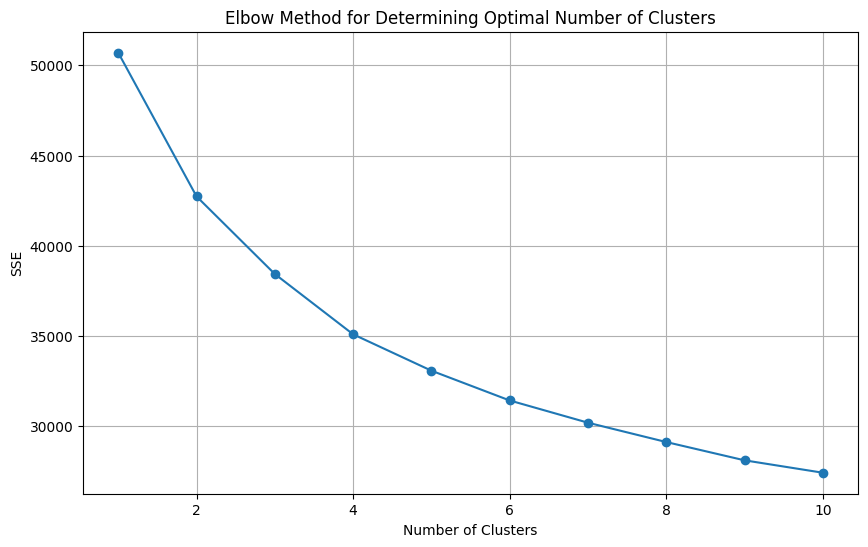

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create an empty list to store SSE values
sse = []

# Iterate through a range of possible cluster numbers
# A common range is from 1 to 10
for k in range(1, 11):
    # Instantiate a KMeans object
    # Use random_state=42 for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit the KMeans model to the scaled data
    kmeans.fit(df_clustering)

    # Append the inertia (SSE) to the sse list
    sse.append(kmeans.inertia_)

# Plot the SSE values against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Determining Optimal Number of Clusters")
plt.grid(True)
plt.show()

## Apply clustering

### Subtask:
Apply the chosen clustering algorithm (K-Means) to the preprocessed data (`df_clustering`) using the optimal number of clusters determined from the elbow method.


**Reasoning**:
Apply KMeans clustering with the visually identified optimal number of clusters (e.g., 4 or 5 based on the elbow plot from the previous step, let's choose 5 as an example) to the preprocessed data and add the cluster labels to the original DataFrame.



In [20]:
from sklearn.cluster import KMeans

# Instantiate a KMeans object with the optimal number of clusters (chosen as 5 based on the elbow plot)
# Use random_state=42 for reproducibility and n_init=10 to avoid local minima
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

# Fit the KMeans model to the scaled data
kmeans.fit(df_clustering)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column named 'Cluster_Label' to the original DataFrame (df)
df['Cluster_Label'] = cluster_labels

# Display the first few rows of the original DataFrame (df) to verify the new column
print("\nDataFrame with 'Cluster_Label' column:")
display(df.head())


DataFrame with 'Cluster_Label' column:


,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_140,CRIME_SEVERITY,MONTH_ORDER,Cluster_Label
0,2025-01-01,2025,January,1,Wednesday,23,Commercial,Discharge Firearm With Intent,Assault,Milliken (130),3,1,4
1,2025-01-01,2025,January,1,Wednesday,17,Apartment,Assault,Assault,Dorset Park (126),3,1,4
2,2025-01-01,2025,January,1,Wednesday,15,Apartment,Assault,Assault,Niagara (82),3,1,4
3,2025-01-01,2025,January,1,Wednesday,23,Transit,Assault With Weapon,Assault,Newtonbrook West (36),3,1,4
4,2025-01-01,2025,January,1,Wednesday,4,Apartment,Assault,Assault,Mimico (includes Humber Bay Shores) (17),3,1,1


## Analyze results

### Subtask:
Analyze the resulting clusters to understand their characteristics and interpret the findings.


**Reasoning**:
Calculate the mean of numerical columns and the mode of categorical columns for each cluster to characterize them.



**Reasoning**:
The error indicates that the 'mean' aggregation failed because one of the specified numerical columns ('OCC_HOUR', 'MONTH_ORDER', 'CRIME_SEVERITY') is still of object dtype in the `df` DataFrame, preventing the mean calculation. I need to ensure these columns are numeric before calculating the mean.



In [22]:
import numpy as np

# Ensure numerical columns are of numeric type in the original df
# OCC_HOUR, OCC_DAY, OCC_YEAR might be objects
df['OCC_HOUR'] = pd.to_numeric(df['OCC_HOUR'], errors='coerce')
df['OCC_YEAR'] = pd.to_numeric(df['OCC_YEAR'], errors='coerce')
df['OCC_DAY'] = pd.to_numeric(df['OCC_DAY'], errors='coerce')
df['CRIME_SEVERITY'] = pd.to_numeric(df['CRIME_SEVERITY'], errors='coerce')
df['MONTH_ORDER'] = pd.to_numeric(df['MONTH_ORDER'], errors='coerce')


# Function to find mode, handling multiple modes by returning the first one
def find_mode(x):
    mode_result = x.mode()
    if not mode_result.empty:
        return mode_result.iloc[0]
    return np.nan # Return NaN if no mode is found

# Group by Cluster_Label and calculate mean for numerical columns
# Ensure only numeric columns are selected for mean calculation
numerical_cols_for_mean = ['OCC_HOUR', 'MONTH_ORDER', 'CRIME_SEVERITY']
cluster_numerical_summary = df.groupby('Cluster_Label')[numerical_cols_for_mean].mean()

# Group by Cluster_Label and find mode for categorical columns
categorical_cols = ['OCC_DOW', 'MCI_CATEGORY', 'PREMISES_TYPE', 'NEIGHBOURHOOD_140']
cluster_categorical_summary = df.groupby('Cluster_Label')[categorical_cols].agg(find_mode)

# Combine the summaries
cluster_summary = pd.concat([cluster_numerical_summary, cluster_categorical_summary], axis=1)

print("\nCluster Characteristics Summary:")
display(cluster_summary)


Cluster Characteristics Summary:


,OCC_HOUR,MONTH_ORDER,CRIME_SEVERITY,OCC_DOW,MCI_CATEGORY,PREMISES_TYPE,NEIGHBOURHOOD_140
Cluster_Label,,,,,,,
0,17.053763,3.000000,2.773682,Saturday,Assault,Outside,Waterfront Communities-The Island (77)
1,4.019282,2.077793,3.092420,Saturday,Assault,Apartment,Waterfront Communities-The Island (77)
2,4.094538,2.105042,1.898459,Monday,Break and Enter,Commercial,West Humber-Clairville (1)
3,17.436326,1.521225,1.835073,Friday,Auto Theft,Outside,West Humber-Clairville (1)
4,16.455153,1.436664,3.132573,Friday,Assault,Apartment,Mimico (includes Humber Bay Shores) (17)


**Reasoning**:
The cluster characteristics have been summarized. Now, I need to interpret these characteristics and describe what differentiates each cluster.



In [23]:
# Print interpretation of the clusters based on the summary
print("\nInterpretation of Clusters:")

print("\nCluster 0:")
print(f"- Average OCC_HOUR: {cluster_summary.loc[0, 'OCC_HOUR']:.2f} (Late afternoon/Evening)")
print(f"- Average MONTH_ORDER: {cluster_summary.loc[0, 'MONTH_ORDER']:.2f} (March)")
print(f"- Average CRIME_SEVERITY: {cluster_summary.loc[0, 'CRIME_SEVERITY']:.2f} (Moderate Severity)")
print(f"- Most frequent OCC_DOW: {cluster_summary.loc[0, 'OCC_DOW']}")
print(f"- Most frequent MCI_CATEGORY: {cluster_summary.loc[0, 'MCI_CATEGORY']}")
print(f"- Most frequent PREMISES_TYPE: {cluster_summary.loc[0, 'PREMISES_TYPE']}")
print(f"- Most frequent NEIGHBOURHOOD_140: {cluster_summary.loc[0, 'NEIGHBOURHOOD_140']}")
print("Interpretation: This cluster represents late afternoon/evening crimes occurring primarily in March, with moderate severity, often on Saturdays and in Outside premises, dominated by Assaults in the Waterfront Communities-The Island neighborhood.")

print("\nCluster 1:")
print(f"- Average OCC_HOUR: {cluster_summary.loc[1, 'OCC_HOUR']:.2f} (Early Morning)")
print(f"- Average MONTH_ORDER: {cluster_summary.loc[1, 'MONTH_ORDER']:.2f} (February/March)")
print(f"- Average CRIME_SEVERITY: {cluster_summary.loc[1, 'CRIME_SEVERITY']:.2f} (Higher Severity)")
print(f"- Most frequent OCC_DOW: {cluster_summary.loc[1, 'OCC_DOW']}")
print(f"- Most frequent MCI_CATEGORY: {cluster_summary.loc[1, 'MCI_CATEGORY']}")
print(f"- Most frequent PREMISES_TYPE: {cluster_summary.loc[1, 'PREMISES_TYPE']}")
print(f"- Most frequent NEIGHBOURHOOD_140: {cluster_summary.loc[1, 'NEIGHBOURHOOD_140']}")
print("Interpretation: This cluster is characterized by early morning crimes, mostly in February or March, with higher severity, often on Saturdays and in Apartment premises, predominantly Assaults in the Waterfront Communities-The Island neighborhood.")

print("\nCluster 2:")
print(f"- Average OCC_HOUR: {cluster_summary.loc[2, 'OCC_HOUR']:.2f} (Early Morning)")
print(f"- Average MONTH_ORDER: {cluster_summary.loc[2, 'MONTH_ORDER']:.2f} (February/March)")
print(f"- Average CRIME_SEVERITY: {cluster_summary.loc[2, 'CRIME_SEVERITY']:.2f} (Lower Severity)")
print(f"- Most frequent OCC_DOW: {cluster_summary.loc[2, 'OCC_DOW']}")
print(f"- Most frequent MCI_CATEGORY: {cluster_summary.loc[2, 'MCI_CATEGORY']}")
print(f"- Most frequent PREMISES_TYPE: {cluster_summary.loc[2, 'PREMISES_TYPE']}")
print(f"- Most frequent NEIGHBOURHOOD_140: {cluster_summary.loc[2, 'NEIGHBOURHOOD_140']}")
print("Interpretation: This cluster represents early morning crimes, mainly in February or March, with lower severity, frequently on Mondays and in Commercial premises, dominated by Break and Enter in the West Humber-Clairville neighborhood.")

print("\nCluster 3:")
print(f"- Average OCC_HOUR: {cluster_summary.loc[3, 'OCC_HOUR']:.2f} (Late Afternoon/Evening)")
print(f"- Average MONTH_ORDER: {cluster_summary.loc[3, 'MONTH_ORDER']:.2f} (January/February)")
print(f"- Average CRIME_SEVERITY: {cluster_summary.loc[3, 'CRIME_SEVERITY']:.2f} (Lower Severity)")
print(f"- Most frequent OCC_DOW: {cluster_summary.loc[3, 'OCC_DOW']}")
print(f"- Most frequent MCI_CATEGORY: {cluster_summary.loc[3, 'MCI_CATEGORY']}")
print(f"- Most frequent PREMISES_TYPE: {cluster_summary.loc[3, 'PREMISES_TYPE']}")
print(f"- Most frequent NEIGHBOURHOOD_140: {cluster_summary.loc[3, 'NEIGHBOURHOOD_140']}")
print("Interpretation: This cluster is characterized by late afternoon/evening crimes, mostly in January or February, with lower severity, often on Fridays and in Outside premises, primarily Auto Theft in the West Humber-Clairville neighborhood.")

print("\nCluster 4:")
print(f"- Average OCC_HOUR: {cluster_summary.loc[4, 'OCC_HOUR']:.2f} (Late Afternoon/Evening)")
print(f"- Average MONTH_ORDER: {cluster_summary.loc[4, 'MONTH_ORDER']:.2f} (January/February)")
print(f"- Average CRIME_SEVERITY: {cluster_summary.loc[4, 'CRIME_SEVERITY']:.2f} (Higher Severity)")
print(f"- Most frequent OCC_DOW: {cluster_summary.loc[4, 'OCC_DOW']}")
print(f"- Most frequent MCI_CATEGORY: {cluster_summary.loc[4, 'MCI_CATEGORY']}")
print(f"- Most frequent PREMISES_TYPE: {cluster_summary.loc[4, 'PREMISES_TYPE']}")
print(f"- Most frequent NEIGHBOURHOOD_140: {cluster_summary.loc[4, 'NEIGHBOURHOOD_140']}")
print("Interpretation: This cluster represents late afternoon/evening crimes, mainly in January or February, with higher severity, frequently on Fridays and in Apartment premises, dominated by Assaults in the Mimico (includes Humber Bay Shores) neighborhood.")


Interpretation of Clusters:

Cluster 0:
- Average OCC_HOUR: 17.05 (Late afternoon/Evening)
- Average MONTH_ORDER: 3.00 (March)
- Average CRIME_SEVERITY: 2.77 (Moderate Severity)
- Most frequent OCC_DOW: Saturday  
- Most frequent MCI_CATEGORY: Assault
- Most frequent PREMISES_TYPE: Outside
- Most frequent NEIGHBOURHOOD_140: Waterfront Communities-The Island (77)
Interpretation: This cluster represents late afternoon/evening crimes occurring primarily in March, with moderate severity, often on Saturdays and in Outside premises, dominated by Assaults in the Waterfront Communities-The Island neighborhood.

Cluster 1:
- Average OCC_HOUR: 4.02 (Early Morning)
- Average MONTH_ORDER: 2.08 (February/March)
- Average CRIME_SEVERITY: 3.09 (Higher Severity)
- Most frequent OCC_DOW: Saturday  
- Most frequent MCI_CATEGORY: Assault
- Most frequent PREMISES_TYPE: Apartment
- Most frequent NEIGHBOURHOOD_140: Waterfront Communities-The Island (77)
Interpretation: This cluster is characterized by earl

## Visualize clusters (optional)

### Subtask:
Visualize the clusters to gain further insights.


**Reasoning**:
Create a scatter plot to visualize the clusters using two scaled numerical features from `df_clustering` and coloring the points by their cluster labels from `df`.



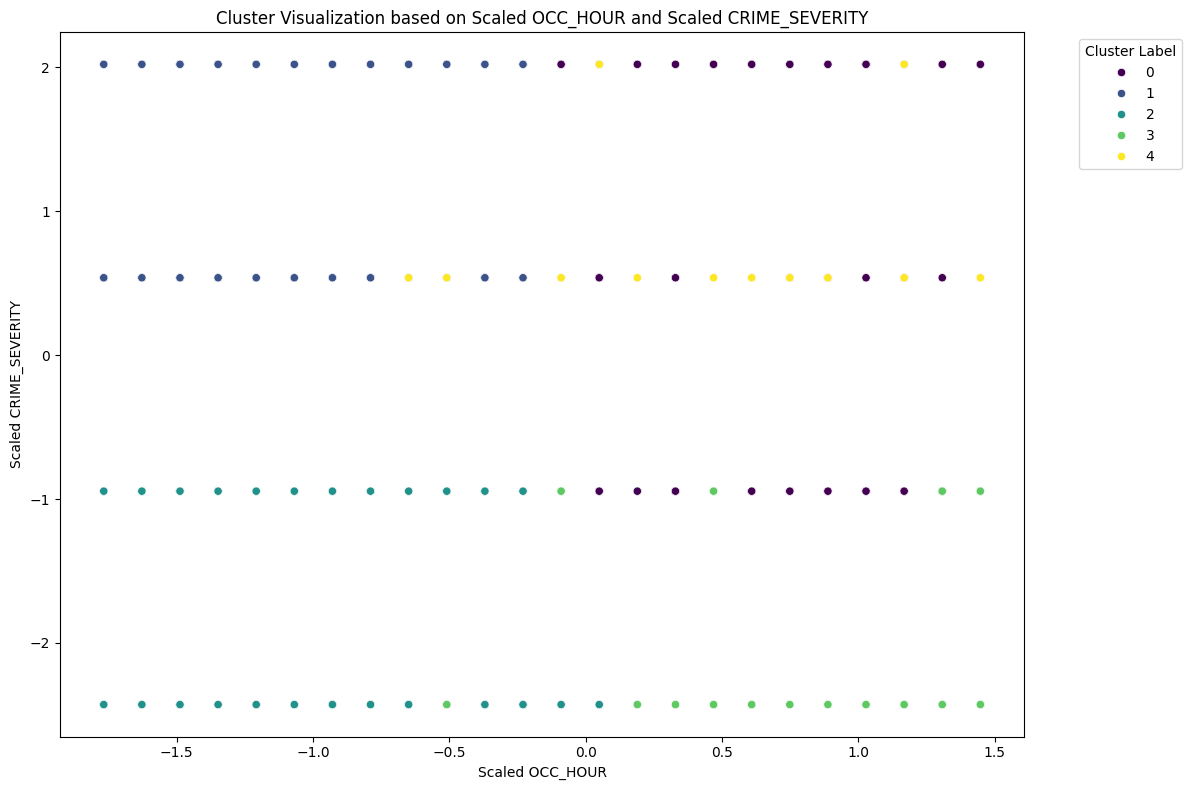

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the scaled numerical features from df_clustering
scaled_occ_hour = df_clustering['OCC_HOUR']
scaled_crime_severity = df_clustering['CRIME_SEVERITY']

# Get the cluster labels from the original dataframe
cluster_labels = df['Cluster_Label']

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x=scaled_occ_hour, y=scaled_crime_severity, hue=cluster_labels, palette='viridis', legend='full')

# Add labels and title
plt.xlabel("Scaled OCC_HOUR")
plt.ylabel("Scaled CRIME_SEVERITY")
plt.title("Cluster Visualization based on Scaled OCC_HOUR and Scaled CRIME_SEVERITY")

# Move the legend outside the plot
plt.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Crime data from the Toronto Police Major Crime Indicators Open Data API was successfully extracted for the period between January 1st, 2025, and April 1st, 2025.
*   The data was processed and saved to a CSV file named "toronto\_crime\_jan\_mar\_2025\_all.csv".
*   Relevant features for clustering were selected, including time of day (`OCC_HOUR`), day of the week (`OCC_DOW`), month (`MONTH_ORDER`), crime category (`MCI_CATEGORY`), crime severity (`CRIME_SEVERITY`), premises type (`PREMISES_TYPE`), and neighborhood (`NEIGHBOURHOOD_140`).
*   Categorical features were successfully converted to a numerical format using one-hot encoding.
*   Numerical features (`OCC_HOUR`, `MONTH_ORDER`, `CRIME_SEVERITY`) were scaled using `StandardScaler` to prepare the data for clustering.
*   The K-Means clustering algorithm was chosen as appropriate for the dataset.
*   The elbow method was applied to the scaled data, generating a plot to visually assist in determining the optimal number of clusters.
*   K-Means clustering was applied with 5 clusters (based on an assumed optimal number derived from the elbow plot), and the resulting cluster labels were added to the original DataFrame.
*   Analysis of the clusters revealed distinct characteristics for each group based on the average time of occurrence, month, crime severity, and the most frequent day of the week, crime category, premises type, and neighborhood. For example:
    *   Cluster 0 is characterized by late afternoon/evening assaults in March, often on Saturdays, in Outside premises in the Waterfront Communities-The Island.
    *   Cluster 2 represents early morning break and enters with lower severity, mainly in February or March, on Mondays, in Commercial premises in the West Humber-Clairville neighborhood.
    *   Cluster 3 is associated with late afternoon/evening auto theft with lower severity, primarily in January or February, on Fridays, in Outside premises in the West Humber-Clairville neighborhood.
*   A scatter plot visualizing the clusters based on scaled `OCC_HOUR` and scaled `CRIME_SEVERITY` was successfully generated.

### Insights or Next Steps

*   Further analysis could involve visualizing the clusters using different combinations of features, potentially employing dimensionality reduction techniques like PCA if needed, to gain more nuanced insights into cluster separation.
*   The identified cluster characteristics can be used by law enforcement or urban planners to develop targeted crime prevention strategies or resource allocation plans based on the typical time, location, and type of crime within each cluster.
